# Mobile Price Classification with Random Forest Calssifier

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
df = pd.read_csv('data/mobile_price_classificatoin.csv')

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

This is the target variable with value of **0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)**.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.shape

(2000, 21)

### Exploaratory data analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


<AxesSubplot: xlabel='price_range', ylabel='count'>

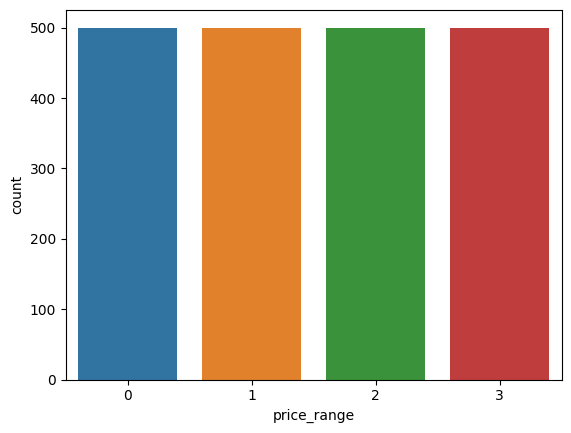

In [8]:
sns.countplot(x= 'price_range', data=df)

This is balanced dataset

In [9]:
#seperating categorical variables and cuntinous variables
cat_feat = []
num_feat = []

for col in df.columns:
    unique_values = len(df[col].unique())
    if unique_values < 10:
        cat_feat.append(col)
    else:
        num_feat.append(col)

In [10]:
cat_feat

['blue',
 'dual_sim',
 'four_g',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [11]:
num_feat

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

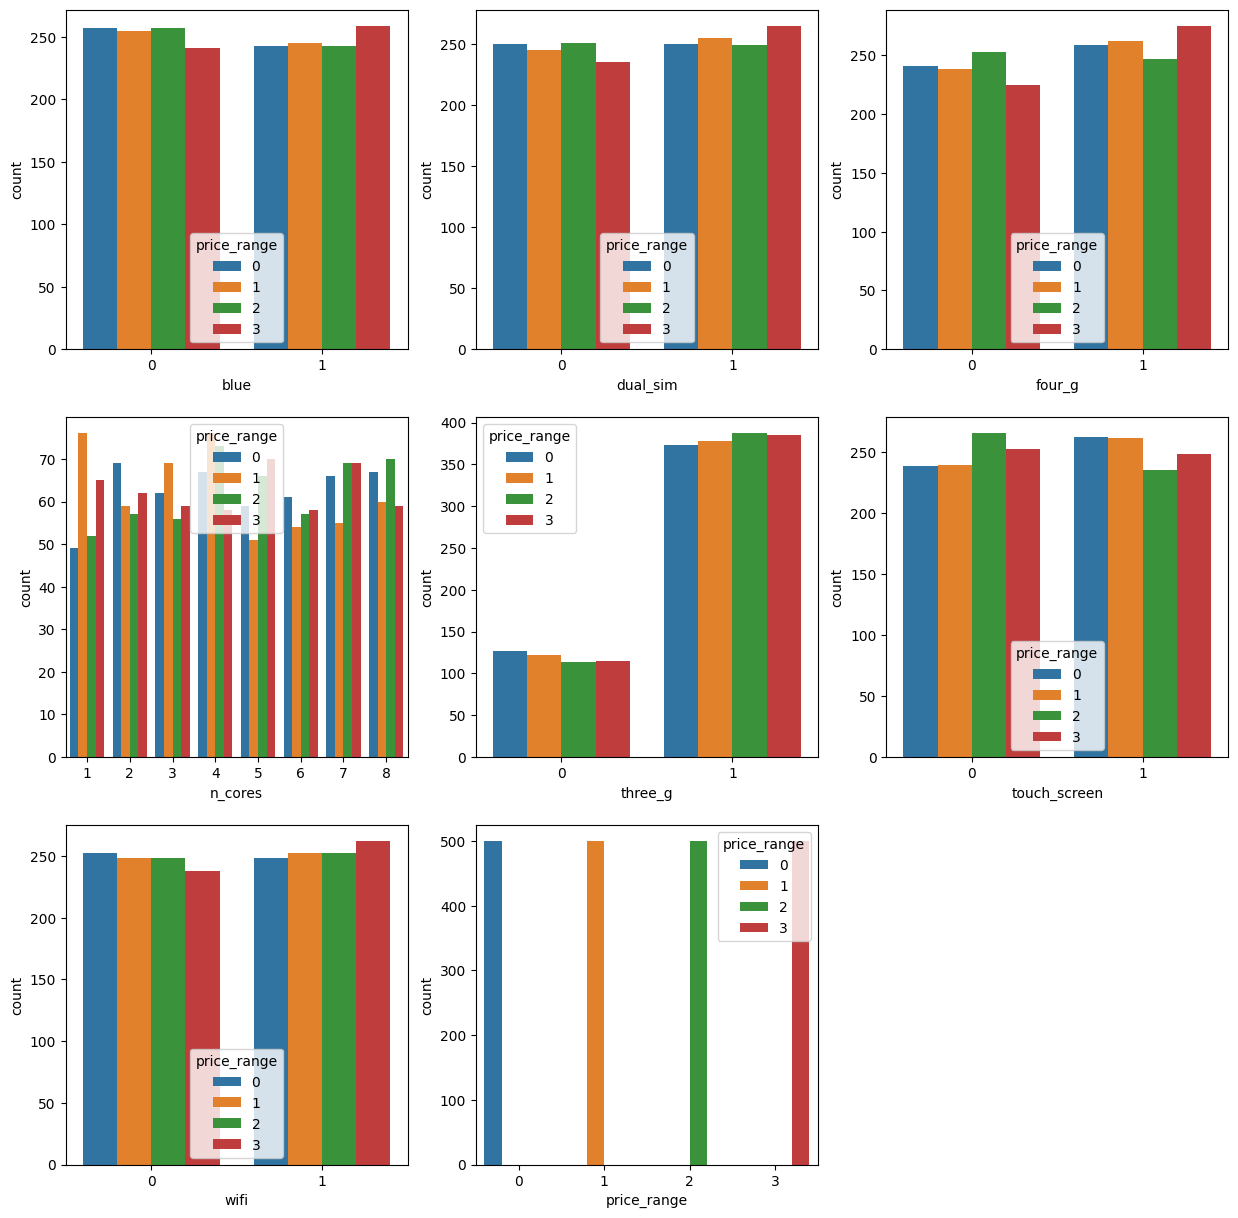

In [12]:
#examining categorical features
plt.figure(figsize=(15,15))
for i, col in enumerate(cat_feat, 1):
    plt.subplot(3,3,i)
    sns.countplot(x=df[col], data=df, hue='price_range')

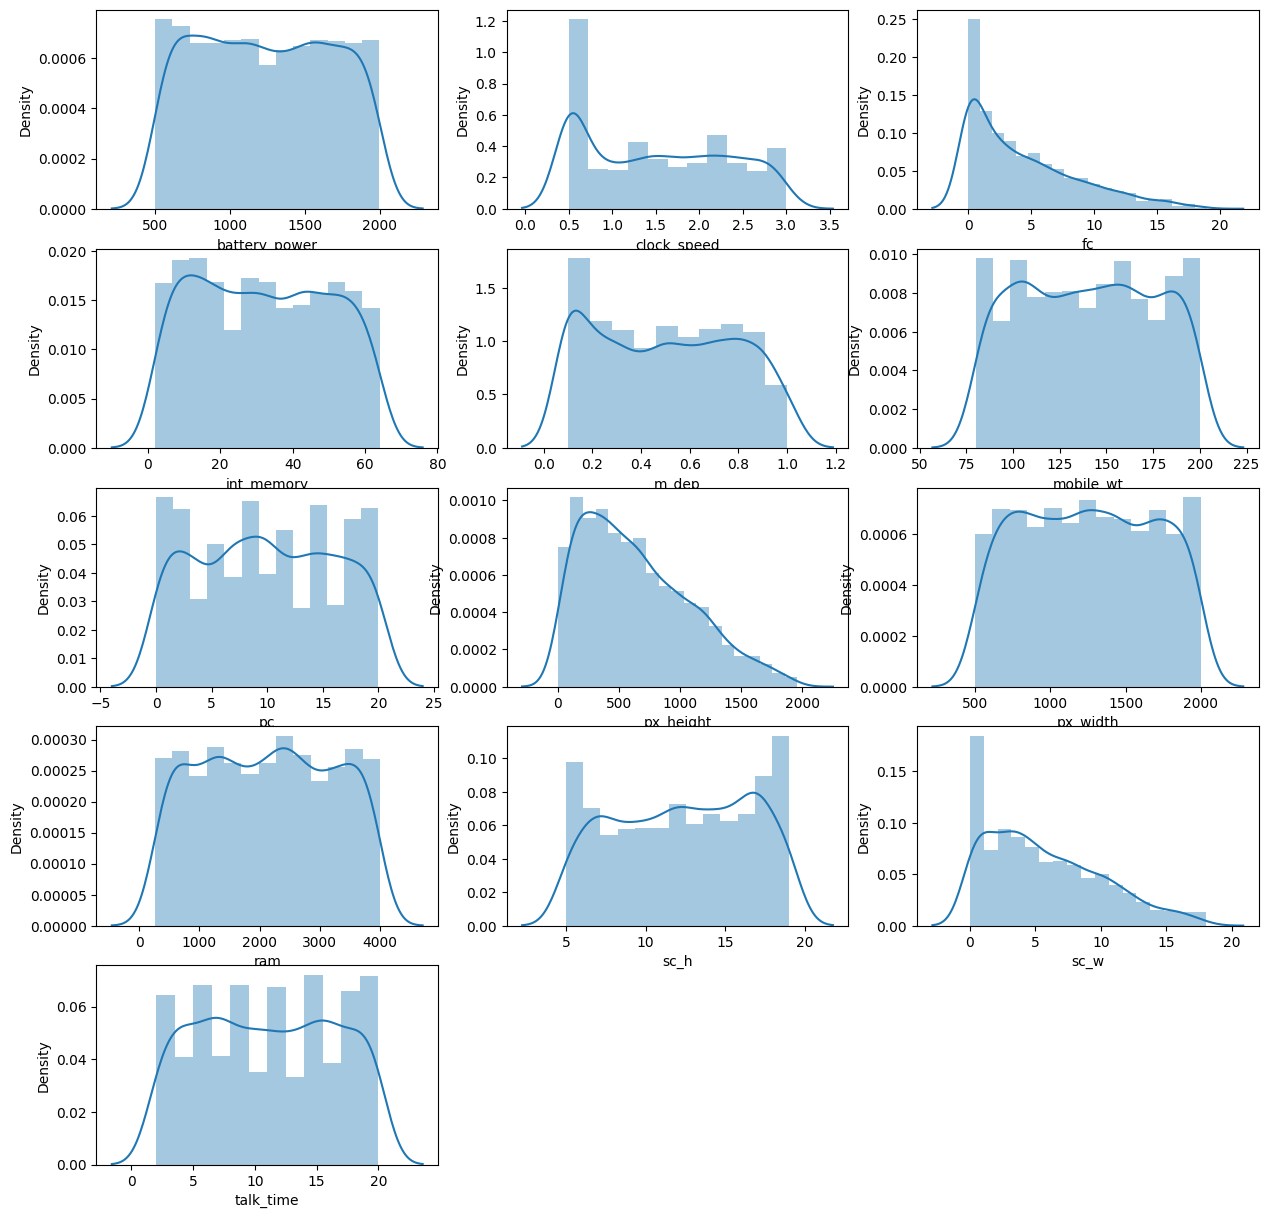

In [13]:
#distribution of numerical features
plt.figure(figsize=(15,15))
for i, col in enumerate(num_feat, 1):
    plt.subplot(5,3, i)
    sns.distplot(df[col])

### Data preprocessing

In [14]:
#checking for null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
#checking for duplicated entries
df.duplicated().sum()

0

In [16]:
#seperating features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

In [17]:
#splitting dataset into train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Model Training 

In [47]:
#model training
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred = rfc.predict(X_test)

rfc.score(X_test, y_test)

0.8525

In [37]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 5,
 'verbose': 0,
 'warm_start': False}

In [51]:
from sklearn.model_selection import RandomizedSearchCV

params = {'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 25, 50, 100]}

rancv = RandomizedSearchCV(estimator=rfc, cv=10, param_distributions=params, n_iter = 100, n_jobs=-1)

In [52]:
rancv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 25, 50, 100]})

In [53]:
rancv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy'}

In [54]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf= 2, max_features= 'auto', max_depth= 20, criterion= 'entropy')

rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_leaf=2)

### Model evaluation

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rfc.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[86,  6,  0,  0],
       [ 7, 80,  9,  0],
       [ 0, 14, 87,  5],
       [ 0,  0, 13, 93]], dtype=int64)

In [60]:
accuracy_score(y_test, y_pred)

0.865

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        92
           1       0.80      0.83      0.82        96
           2       0.80      0.82      0.81       106
           3       0.95      0.88      0.91       106

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.86      0.87       400

